In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import matplotlib.pyplot as plt

import tensorflow as tf

tf.enable_eager_execution()


/Users/lancastro/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/lancastro/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/lancastro/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/lancastro/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
train_dataset_url = ""

train_dataset_fp = tf.keras.utils.get_file(fname=os.path.basename(train_dataset_url),
                                           origin=train_dataset_url)

print("Local copy of the dataset file: {}".format(train_dataset_fp))

8192/2194 [================================================================================================================] - 0s 0us/step
Local copy of the dataset file: /Users/lancastro/.keras/datasets/iris_training.csv


In [3]:
!head -n5 {train_dataset_fp}

120,4,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0


In [4]:
# column order in CSV file
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

feature_names = column_names[:-1]
label_name = column_names[-1]

print("Features: {}".format(feature_names))
print("Label: {}".format(label_name))

Features: ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
Label: species


In [5]:
class_names = ['Iris setosa', 'Iris versicolor', 'Iris virginica']

In [6]:
batch_size = 32

train_dataset = tf.contrib.data.make_csv_dataset(
    train_dataset_fp,
    batch_size,
    column_names=column_names,
    label_name=label_name,
    num_epochs=1)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use `tf.data.experimental.make_csv_dataset(...)`.


In [7]:
features, labels = next(iter(train_dataset))

features

Instructions for updating:
Colocations handled automatically by placer.


OrderedDict([('sepal_length',
              <tf.Tensor: id=58, shape=(32,), dtype=float32, numpy=
              array([7.2, 7.3, 5.2, 6.1, 6.7, 4.6, 6.9, 5.5, 5. , 6.5, 5.5, 6.7, 5.1,
                     5.4, 6.3, 6. , 6.6, 5.2, 6.5, 5.8, 4.4, 5. , 6.3, 5.4, 4.5, 6.5,
                     5.5, 5.6, 4.8, 6.3, 6. , 5.7], dtype=float32)>),
             ('sepal_width',
              <tf.Tensor: id=59, shape=(32,), dtype=float32, numpy=
              array([3. , 2.9, 2.7, 3. , 3.1, 3.2, 3.1, 2.6, 3.4, 3. , 2.4, 3. , 2.5,
                     3.9, 3.3, 2.9, 2.9, 3.5, 2.8, 2.6, 3. , 3.2, 3.4, 3.7, 2.3, 3. ,
                     3.5, 2.7, 3. , 2.3, 2.2, 2.9], dtype=float32)>),
             ('petal_length',
              <tf.Tensor: id=56, shape=(32,), dtype=float32, numpy=
              array([5.8, 6.3, 3.9, 4.9, 5.6, 1.4, 4.9, 4.4, 1.6, 5.8, 3.8, 5. , 3. ,
                     1.7, 4.7, 4.5, 4.6, 1.5, 4.6, 4. , 1.3, 1.2, 5.6, 1.5, 1.3, 5.2,
                     1.3, 4.2, 1.4, 4.4, 5. , 4.2],

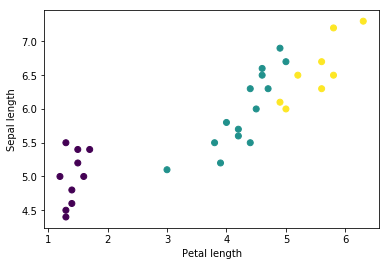

In [8]:
plt.scatter(features['petal_length'].numpy(),
            features['sepal_length'].numpy(),
            c=labels.numpy(),
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()

In [9]:
def pack_features_vector(features, labels):
  """Pack the features into a single array."""
  features = tf.stack(list(features.values()), axis=1)
  return features, labels

In [10]:
train_dataset = train_dataset.map(pack_features_vector)

In [11]:
features, labels = next(iter(train_dataset))

print(features[:5])

tf.Tensor(
[[6.4 3.1 5.5 1.8]
 [6.5 2.8 4.6 1.5]
 [6.8 2.8 4.8 1.4]
 [5.1 2.5 3.  1.1]
 [6.  2.7 5.1 1.6]], shape=(5, 4), dtype=float32)


In [12]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

In [13]:
predictions = model(features)
predictions[:5]

<tf.Tensor: id=200, shape=(5, 3), dtype=float32, numpy=
array([[-2.5760436 ,  2.5570545 , -0.8879831 ],
       [-2.5335228 ,  2.6545045 , -1.0089116 ],
       [-2.5360296 ,  2.740497  , -1.0531559 ],
       [-2.1842268 ,  2.12286   , -0.83826387],
       [-2.3176436 ,  2.395446  , -0.85542727]], dtype=float32)>

In [14]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: id=206, shape=(5, 3), dtype=float32, numpy=
array([[0.00568342, 0.9635752 , 0.03074148],
       [0.00541394, 0.9697178 , 0.02486818],
       [0.00497278, 0.97311914, 0.02190804],
       [0.01264769, 0.93876135, 0.04859095],
       [0.00856815, 0.9544559 , 0.03697596]], dtype=float32)>

In [15]:
def loss(model, x, y):
  y_ = model(x)
  return tf.losses.sparse_softmax_cross_entropy(labels=y, logits=y_)


l = loss(model, features, labels)
print("Loss test: {}".format(l))

Instructions for updating:
Use tf.cast instead.
Loss test: 2.6532700061798096


In [16]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

global_step = tf.Variable(0)

In [18]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(global_step.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)

print("Step: {},         Loss: {}".format(global_step.numpy(),
                                          loss(model, features, labels).numpy()))

Step: 0, Initial Loss: 2.6532700061798096
Step: 1,         Loss: 2.2527618408203125


In [19]:
## Note: Rerunning this cell uses the same model variables

from tensorflow import contrib
tfe = contrib.eager

# keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tfe.metrics.Mean()
  epoch_accuracy = tfe.metrics.Accuracy()

  # Training loop - using batches of 32
  for x, y in train_dataset:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables),
                              global_step)

    # Track progress
    epoch_loss_avg(loss_value)  # add current batch loss
    # compare predicted label to actual label
    epoch_accuracy(tf.argmax(model(x), axis=1, output_type=tf.int32), y)

  # end epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 2.049, Accuracy: 30.000%
Epoch 050: Loss: 0.517, Accuracy: 85.000%
Epoch 100: Loss: 0.327, Accuracy: 90.833%
Epoch 150: Loss: 0.227, Accuracy: 95.833%
Epoch 200: Loss: 0.177, Accuracy: 97.500%


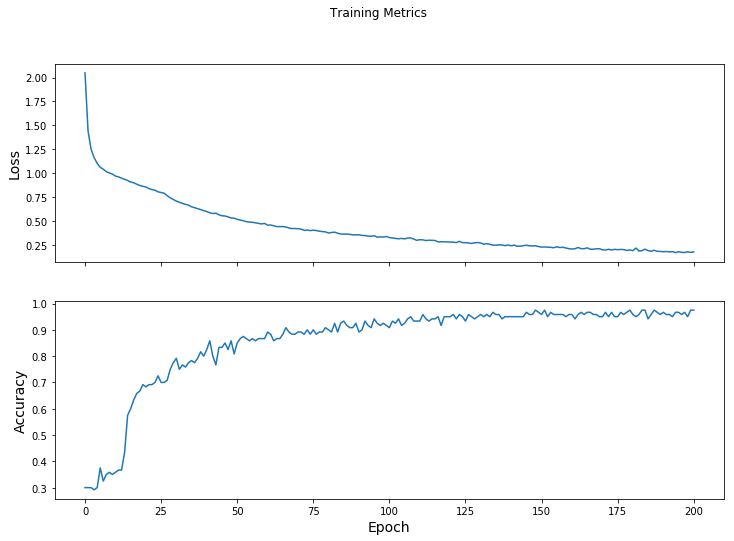

In [20]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

In [21]:
test_url = "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv"

test_fp = tf.keras.utils.get_file(fname=os.path.basename(test_url),
                                  origin=test_url)

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


In [22]:
test_dataset = tf.contrib.data.make_csv_dataset(
    test_fp,
    batch_size,
    column_names=column_names,
    label_name='species',
    num_epochs=1,
    shuffle=False)

test_dataset = test_dataset.map(pack_features_vector)

In [23]:
test_accuracy = tfe.metrics.Accuracy()

for(x, y) in test_dataset:
  logits = model(x)
  prediction = tf.argmax(logits, axis=1, output_type=tf.int32)
  test_accuracy(prediction,y)
  
print("Test set accuracy: {:.3}".format(test_accuracy.result()))

Test set accuracy: 0.967


In [24]:
tf.stack([y, prediction], axis=1)

<tf.Tensor: id=107880, shape=(30, 2), dtype=int32, numpy=
array([[1, 1],
       [2, 2],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [2, 2],
       [1, 1],
       [2, 2],
       [2, 2],
       [0, 0],
       [2, 2],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 2],
       [2, 2],
       [1, 1],
       [1, 1],
       [1, 1],
       [0, 0],
       [1, 1],
       [2, 2],
       [1, 1]], dtype=int32)>

In [25]:
predict_dataset = tf.convert_to_tensor([
    [5.1, 3.3, 1.7, 0.5,],
    [5.9, 3.0, 4.2, 1.5,],
    [6.9, 3.1, 5.4, 2.1]
])

predictions = model(predict_dataset)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Iris setosa (96.7%)
Example 1 prediction: Iris versicolor (84.2%)
Example 2 prediction: Iris virginica (64.0%)
